# Distances

Pertpy offers implementations of popular distance metrics between groups of
single cells. This notebooks shows some of the available distances and use cases
for such distances in data analysis of perturbation data.

In [20]:
import scanpy as sc
import numpy as np
import pertpy as pt
import matplotlib.pyplot as plt

# Data

In [22]:
adata = pt.dt.dixit_2016_scperturb()
obs_key = 'perturbation'  # defines groups to test

In [23]:
adata.layers['counts'] = adata.X.copy()

# basic qc and pp
sc.pp.filter_cells(adata, min_counts=1000)
sc.pp.normalize_per_cell(adata)
sc.pp.filter_genes(adata, min_cells=50)
sc.pp.log1p(adata)

# subsample against high class imbalance
N_min = 100
counts = adata.obs[obs_key].value_counts()
groups = counts.index[counts>=N_min]
indices = [np.random.choice(adata.obs_names[adata.obs[obs_key]==group], size=N_min, replace=False) for group in groups]
selection = np.hstack(np.array(indices))
adata = adata[selection].copy()
sc.pp.filter_genes(adata, min_cells=3)  # sanity cleaning

# select HVGs
n_var_max = 2000  # max total features to select
sc.pp.highly_variable_genes(adata, n_top_genes=n_var_max, subset=False, flavor='seurat_v3', layer='counts')
sc.pp.pca(adata, use_highly_variable=True)

In [5]:
sc.pp.neighbors(adata, use_rep='X_pca', n_neighbors=30, n_pcs=30)
sc.tl.umap(adata)

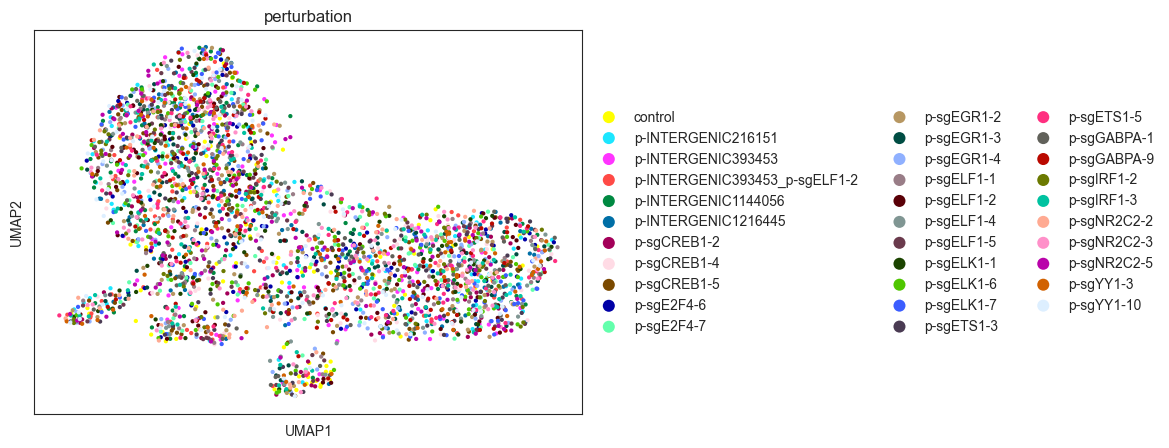

In [6]:
sc.pl.scatter(adata, basis='umap', color=obs_key, show=True)

# Edistance

In [19]:
distance = pt.tl.Distance('edistance', 'X_pca')
df = distance.pairwise(adata, groupby=obs_key, verbose=True)

Output()

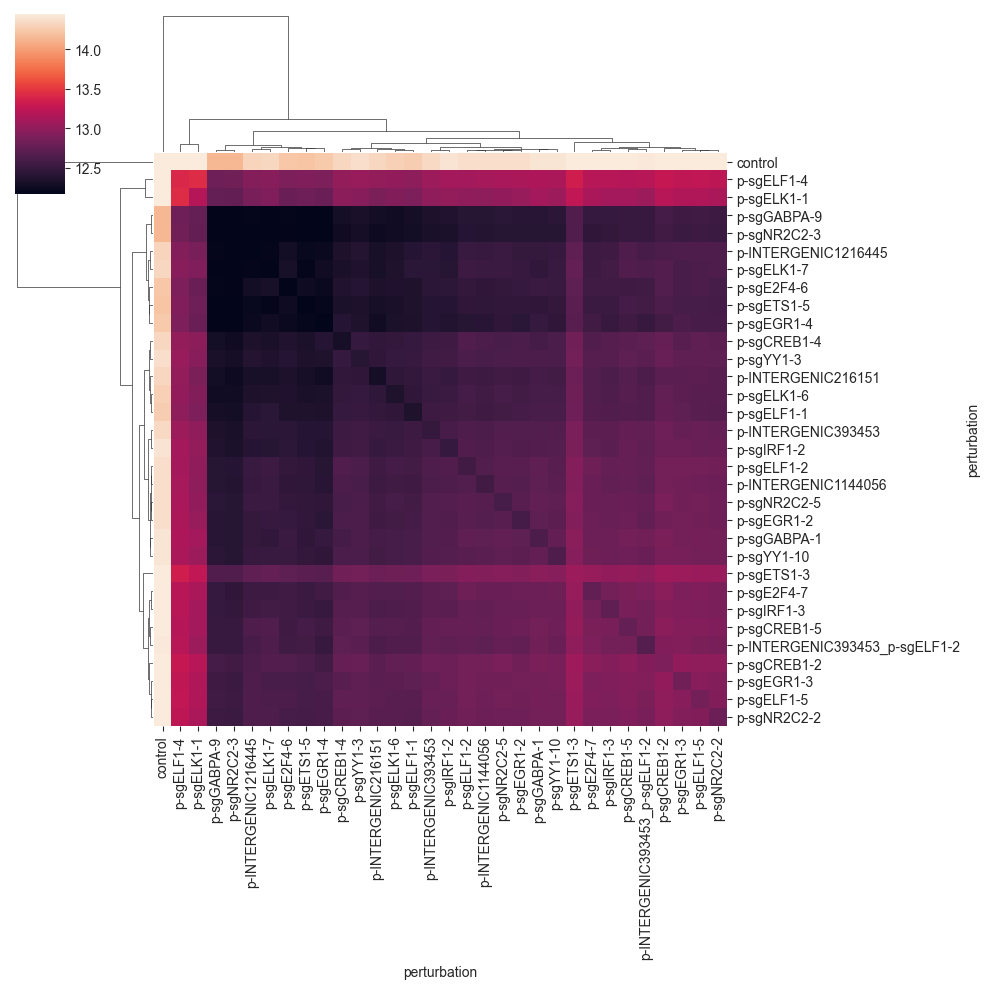

In [17]:
from seaborn import clustermap
clustermap(df, robust=True, figsize=(10,10))
plt.show()

# PseudobulkDistance

In [11]:
distance = pt.tl.Distance('pseudobulk', 'X_pca')
df = distance.pairwise(adata, groupby=obs_key, verbose=True)

Output()

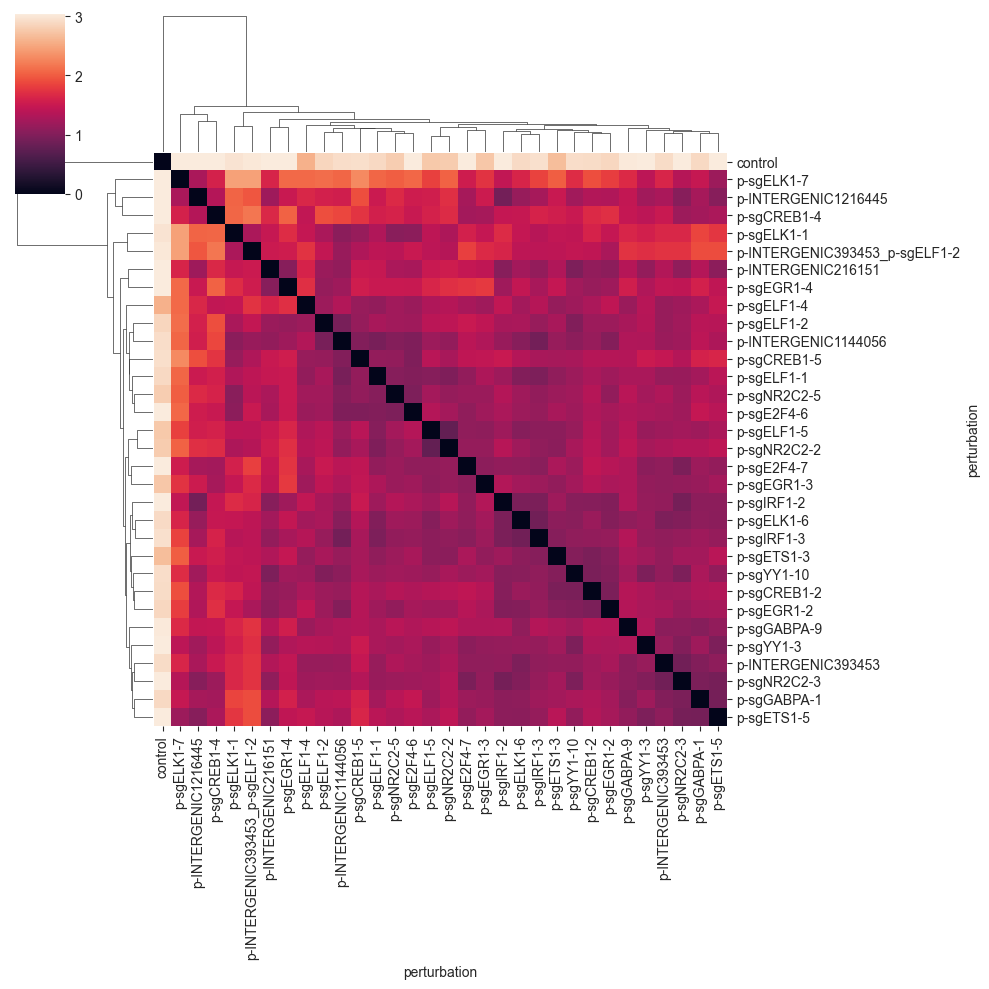

In [12]:
from seaborn import clustermap
clustermap(df, robust=True, figsize=(10,10))
plt.show()

# Mean Pairwise Distance

In [13]:
distance = pt.tl.Distance('mean_pairwise', 'X_pca')
df = distance.pairwise(adata, groupby=obs_key, verbose=True)

Output()

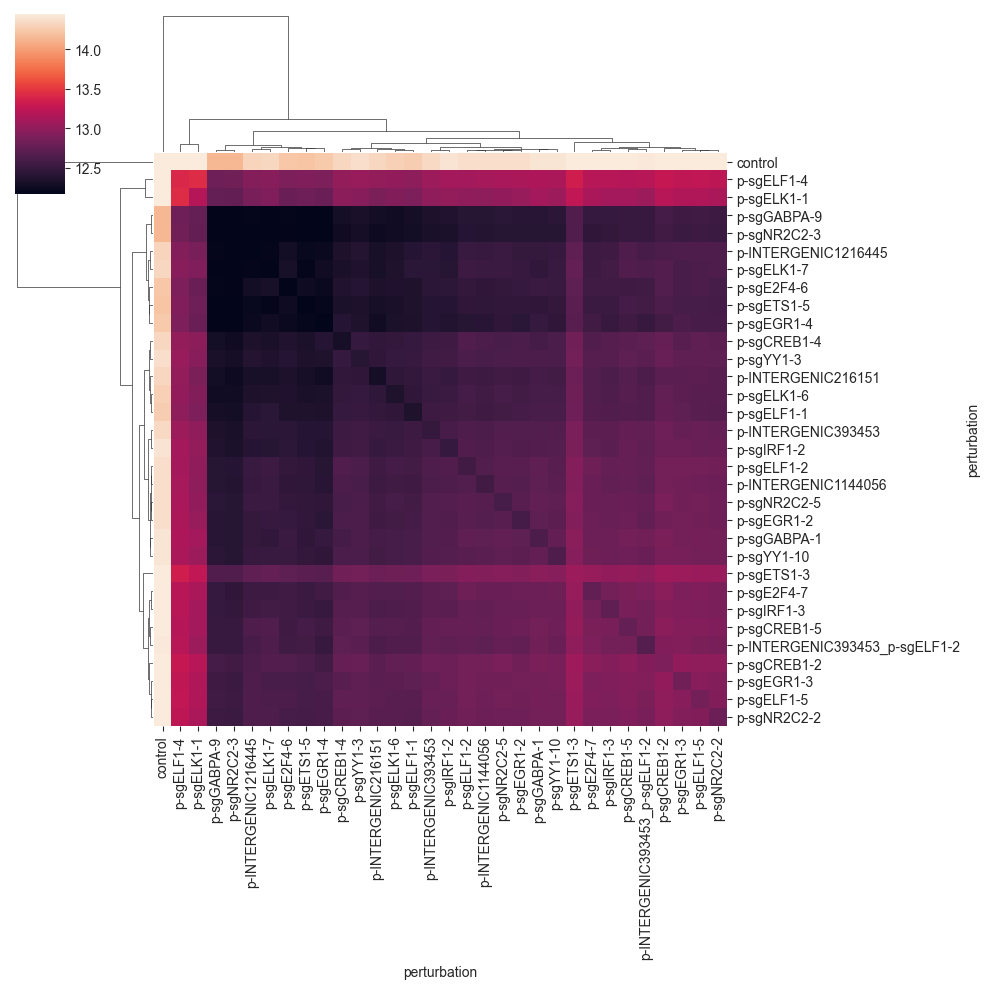

In [14]:
from seaborn import clustermap
clustermap(df, robust=True, figsize=(10,10))
plt.show()